## Command Line Question (CLQ)

#### In the repo you will find the .sh file and the screenshots of the results, as well as a screenshot with the time elapsed

#### We need to answer the following questions:

- What is the most-watched Netflix title?
- Report the average time between subsequent clicks on Netflix.com
- Provide the ID of the user that has spent the most time on Netflix


For this task we use the AWK language, which is (definition from the Wiki page) a data-driven scripting language consisting <br/> of a set of actions to be taken against streams of textual data – either run directly on files or used as part of a pipeline – <br/> for purposes of extracting or transforming text, such as producing formatted reports.




#### Short data analysis

- The cvs has 7 columns (datetime,duration,title,genres,release_date,movie_id,user_id) <br/>plus a index column, and this first row is called the "header".
- The datetime column is not sorted, but is well formatted since <br/>every entry has the "YYYY-MM-DD HH:MM:SS" format.
- The duration column "shows how long it was (in seconds) until that user clicked on another URL. <br/>A watch time of zero seconds means they visited the page but instantly clicked away".<br/> We can also find negative duration values in the dataset, which have to be taken care of.


#### What is the most-watched Netflix title?

- cat "file path" is used to read the cvs file, so that we can work on it.<br/> 
We need to do something similar to a "groupby" in pandas,<br/>
so we select only the positive durations in the column (notice that {\$2>0} filters the positive values) and sum the durations <br/>
for every unique movie_id ({\$(NF-1)} is the column with the movie_id).

- (NF-1) is used to select the second-to-last column, since NF stands for number of fields in a row.<br/>
This will give us the total watchtime for every unique movie_id in the dataset. The last thing to do is to sort the elements and print the first one. <br/>The result is the most watched title on Netflix (so the movie that people have spent the most amount of time watching).


#### Report the average time between subsequent clicks on Netflix.com

First of all, we notice that the "datetime" column is not sorted, so we use the sort function to sort like this. <br/>
We give priority to year, month, day and then time - in ascending order - <br/>
Use the following command: sort -t, -k2,2 -k3,3, which sorts the second and third fields of the second column.<br/>
(Here we show just a couple of lines from the sorted cvs to see how it works)

- 2017-01-01 00:02:21
- 2017-01-01 00:04:26
- 2017-01-01 00:04:47

We can use the mktime function to compute the difference (in seconds, but the conversion in hours is straightforward) <br/>in time between two rows. The code also takes into account the negative time difference, like in this case:

- 2017-01-01 23:51:31,
- 2017-01-02 00:03:20,

If the value is negative just sum (86400 + diff), namely the amount of seconds in a day and the negative difference.<br/>
Finally, print the average, which is the sum of time differences divided by the number of rows without the header <br/>(and -1 since from N rows we get N-1 time differences).

#### Provide the ID of the user that has spent the most time on Netflix

The idea is exactly the same as question one, but instead of grouping by movie_id, we group by user_id, and then sum the durations. <br/>
We still consider the positive values in the duration column. <br/>
This time we use the last column (NF) which has all the user_id. <br/>
This gives us the id of the user that has the highest watchtime on Netflix.






Here are the screenshots of the commandline script, with and without elapsed time.

In [4]:
from IPython.display import Image, display

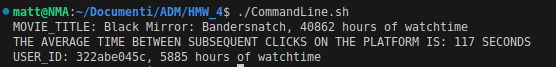

In [5]:
display(Image(filename='CommandLine_screenshots/CommandLine_results.png', embed=True))

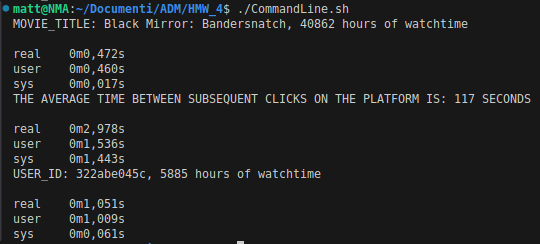

In [6]:
display(Image(filename='CommandLine_screenshots/CommandLine_results_time.png', embed=True))
